##### Forecasting Timeseries Data Using Facebook FbProphet

Steps Required With FbProphet
1. Introduction And Installation
2. Data Preprocessing With Time Seires
3. Model Fitting
4. Obtaining The Forecasts
5. Plotting The Forecasts
6. Cross Validation
7. Computing Performance Metrics
8. Visualize the Performance MEtrics
9. Conclusions


In [51]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt


In [52]:
df=pd.read_csv('../input/monthly-milk-production/monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [53]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [54]:
df.shape

(169, 2)

In [55]:
df.dropna(inplace=True)

In [56]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [57]:
df.columns=["ds","y"]

<AxesSubplot:>

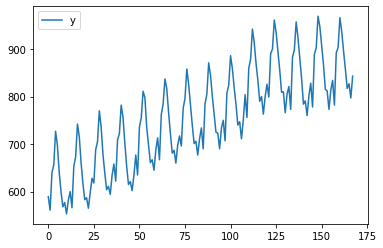

In [58]:
df[['y']].plot()

In [59]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      168 non-null    object 
 1   y       168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [61]:
df['ds']=pd.to_datetime(df['ds'])

In [62]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

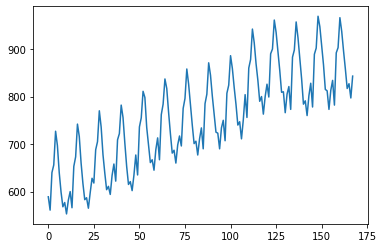

In [63]:
df['y'].plot()

In [64]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

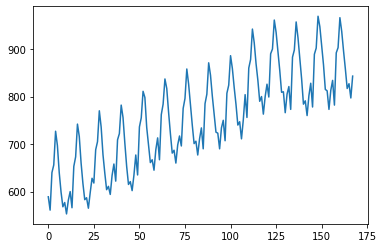

In [65]:
df['y'].plot()

In [66]:
from fbprophet import Prophet

In [67]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [68]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [69]:
### intiialize the Model
model=Prophet()
model.fit(df)

In [70]:
model

In [71]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [72]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [73]:
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [74]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [75]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [76]:
### Prediction
prediction=model.predict(future_dates)

In [77]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.986557,576.230862,596.229373,606.986557,606.986557,-20.126409,-20.126409,-20.126409,-20.126409,-20.126409,-20.126409,0.0,0.0,0.0,586.860148
1,1962-02-01,608.704006,536.399497,556.031031,608.704006,608.704006,-62.546658,-62.546658,-62.546658,-62.546658,-62.546658,-62.546658,0.0,0.0,0.0,546.157348
2,1962-03-01,610.255250,632.563008,651.520920,610.255250,610.255250,31.399834,31.399834,31.399834,31.399834,31.399834,31.399834,0.0,0.0,0.0,641.655084
3,1962-04-01,611.972698,648.615372,668.489950,611.972698,611.972698,46.728034,46.728034,46.728034,46.728034,46.728034,46.728034,0.0,0.0,0.0,658.700732
4,1962-05-01,613.634745,712.101126,731.624832,613.634745,613.634745,108.068895,108.068895,108.068895,108.068895,108.068895,108.068895,0.0,0.0,0.0,721.703640


In [78]:
# (8.974783+27.786856)/2/

In [79]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.432779,803.549044,827.133014
529,1976-11-27,818.581638,807.616477,830.568011
530,1976-11-28,821.905962,811.211392,833.810362
531,1976-11-29,825.344250,814.323604,836.557548
532,1976-11-30,828.827945,817.193740,840.102065


In [80]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.860148,576.230862,596.229373
1,1962-02-01,546.157348,536.399497,556.031031
2,1962-03-01,641.655084,632.563008,651.520920
3,1962-04-01,658.700732,648.615372,668.489950
4,1962-05-01,721.703640,712.101126,731.624832


#### Plotting the Forecasts
 
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

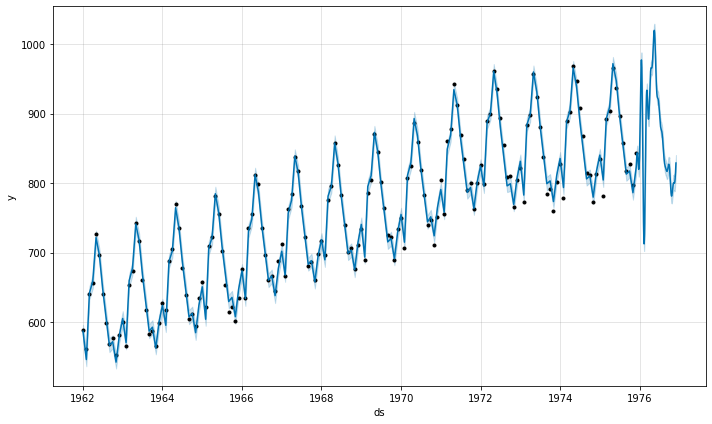

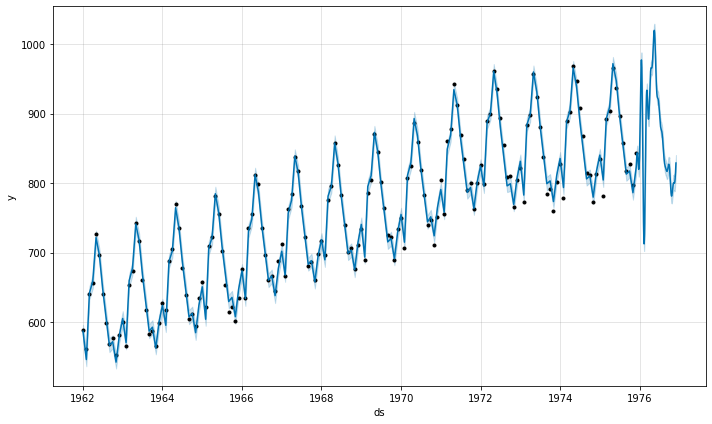

In [81]:
#### plot the predicted projection
model.plot(prediction)

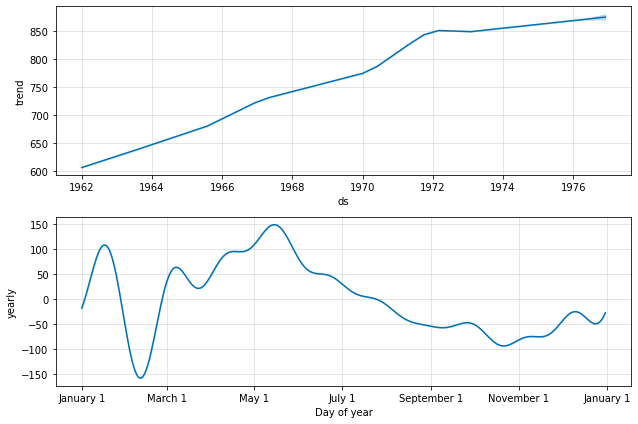

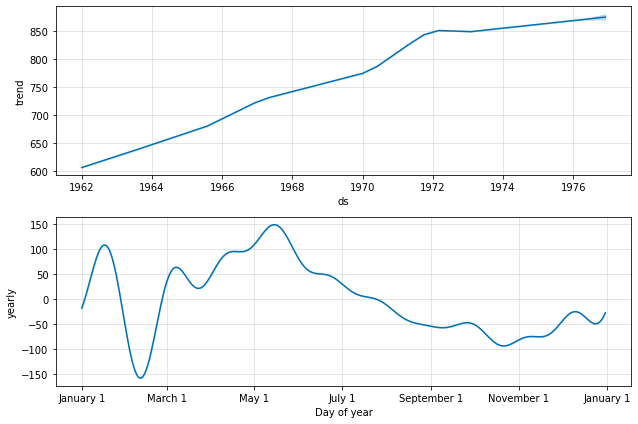

In [82]:
##### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

#### Cross Validation
 
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [83]:
df.shape

(168, 2)

In [84]:
from fbprophet.diagnostics import cross_validation


In [85]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

  0%|          | 0/21 [00:00<?, ?it/s]

In [86]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [87]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,623.983454,622.280925,625.659144,622.0,1965-01-22
1,1965-03-01,704.907587,698.302152,710.954907,709.0,1965-01-22
2,1965-04-01,718.936151,705.108060,730.992663,722.0,1965-01-22
3,1965-05-01,784.822111,763.929353,803.973559,782.0,1965-01-22
4,1965-06-01,752.443357,722.831568,779.948138,756.0,1965-01-22


#### Obtaining the Performance Metrics
 
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [88]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,250.097382,15.814468,12.155051,0.015567,0.013756,0.32
1,41 days,248.072140,15.750306,12.073011,0.015499,0.013756,0.32
2,42 days,262.453687,16.200422,12.522393,0.016126,0.014017,0.32
3,43 days,264.394618,16.260216,12.773289,0.016525,0.014017,0.32
4,46 days,250.935691,15.840950,12.539619,0.016223,0.014017,0.32


/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/opt/conda/lib/python3.7/site-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


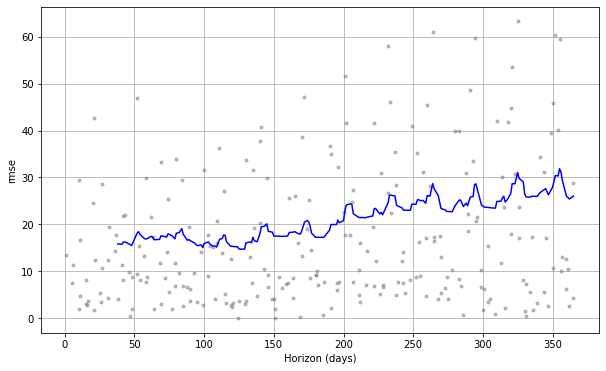

In [89]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')